# Question 1

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC


#  indicating to Pandas that the first row should not be taken as the header
# Load the dataset
df = pd.read_csv("../../data/letter_classification.csv", header=None)
print("Dataset shape:", df.shape)
print("df.head:")
print(df.head())

Dataset shape: (7648, 17)
df.head:
  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0  I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
1  D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
2  G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10
3  B   4   2   5   4   4   8   7   6   6   7   6   6   2   8   7  10
4  A   1   1   3   2   1   8   2   2   2   8   2   8   1   6   2   7


In [20]:
# Separate features and labels
X = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (7648, 16)
y shape: (7648,)


In [21]:
# a. Set random state and split data
randstate = 123
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=randstate
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Check unique class labels
unique_labels = np.unique(y)
print(f"Number of class labels: {len(unique_labels)}")
print(f"Class labels: {unique_labels}")

print("\nMulti-class SVM options:")
print("1. One-vs-Rest (OVR): Train one binary classifier per class")
print("2. One-vs-One (OVO): Train binary classifier for each pair of classes")
print("3. Direct multi-class methods (like Crammer-Singer)")

Training set size: 5353
Test set size: 2295
Number of class labels: 10
Class labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']

Multi-class SVM options:
1. One-vs-Rest (OVR): Train one binary classifier per class
2. One-vs-One (OVO): Train binary classifier for each pair of classes
3. Direct multi-class methods (like Crammer-Singer)


In [ ]:
# b. Create SVM model with OVR
model = SVC(C=1, kernel="rbf", gamma=0.1, decision_function_shape="ovr")

print("\nSVM Parameters explanation:")
print(
    "- C parameter: Controls trade-off between smooth decision boundary and classifying training points correctly"
)
print(
    "- Increasing C: Makes model more complex, tries to classify all training examples correctly (may overfit)"
)
print(
    "- RBF kernel hyperparameter: gamma (γ), controls kernel width/influence of single training example"
)


SVM Parameters explanation:
- C parameter: Controls trade-off between smooth decision boundary and classifying training points correctly
- Increasing C: Makes model more complex, tries to classify all training examples correctly (may overfit)
- RBF kernel hyperparameter: gamma (γ), controls kernel width/influence of single training example


In [ ]:
# c. Train model and evaluate

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest accuracy with gamma=0.1: {test_accuracy:.4f}")


Test accuracy with gamma=0.1: 0.9817


In [26]:
# d. Answer about gamma and localization

print("\nGamma and kernel localization:")
print("- γ = 1/(2σ²) in sklearn's RBF kernel")
print("- For more localized kernel: INCREASE gamma")
print("- Higher gamma → smaller σ → kernel drops off more quickly → more localized")


Gamma and kernel localization:
- γ = 1/(2σ²) in sklearn's RBF kernel
- For more localized kernel: INCREASE gamma
- Higher gamma → smaller σ → kernel drops off more quickly → more localized


In [27]:
# e. Test extreme gamma values
gamma_values = [0.0001, 100]
print(f"\nTesting extreme gamma values:")

for gamma in gamma_values:
    model_extreme = SVC(C=1, kernel="rbf", gamma=gamma, decision_function_shape="ovr")
    model_extreme.fit(X_train, y_train)
    y_pred_extreme = model_extreme.predict(X_test)
    accuracy_extreme = accuracy_score(y_test, y_pred_extreme)
    print(f"Gamma={gamma}: Test accuracy = {accuracy_extreme:.4f}")

print(f"\nComparison:")
print(f"Gamma=0.1 (baseline): {test_accuracy:.4f}")
print(
    "Very small gamma (0.0001): Underfitting - kernel too wide, poor decision boundaries"
)
print(
    "Very large gamma (100): Overfitting - kernel too narrow, memorizes training data"
)


Testing extreme gamma values:
Gamma=0.0001: Test accuracy = 0.7342
Gamma=100: Test accuracy = 0.1869

Comparison:
Gamma=0.1 (baseline): 0.9817
Very small gamma (0.0001): Underfitting - kernel too wide, poor decision boundaries
Very large gamma (100): Overfitting - kernel too narrow, memorizes training data


# Question 2

In [ ]:
# Filter data to include only labels "A" and "B"
dat_subset = df.iloc[(y == "A") | (y == "B"), :]
print(f"Original dataset shape: {df.shape}")
print(f"Subset (A and B only) shape: {dat_subset.shape}")

# Separate features and labels for subset
X_subset = dat_subset.iloc[:, 1:].to_numpy()
y_subset = dat_subset.iloc[:, 0].to_numpy()

print(f"Subset X shape: {X_subset.shape}")
print(f"Subset y shape: {y_subset.shape}")
print(f"Unique labels in subset: {np.unique(y_subset)}")

# Split subset data with same random state
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.3, random_state=randstate
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Original dataset shape: (7648, 17)
Subset (A and B only) shape: (1555, 17)
Subset X shape: (1555, 16)
Subset y shape: (1555,)
Unique labels in subset: ['A' 'B']
Training set size: 1088
Test set size: 467


In [ ]:
# a. Create custom kernel using k-nearest neighbors (k=2)
from sklearn.neighbors import NearestNeighbors

# Create NN object and fit to training data
nbrs = NearestNeighbors(n_neighbors=2, algorithm="kd_tree").fit(X_train)

# Compute connectivity matrix
D_train = nbrs.kneighbors_graph(X_train, mode="connectivity")
D_train = D_train.toarray()  # Convert sparse to dense

print(f"D_train shape before symmetrization: {D_train.shape}")

# Make matrix symmetric (valid Gram matrix)
D_train = (D_train + D_train.T) / 2

print(f"D_train shape after symmetrization: {D_train.shape}")
print(f"Expected dimensionality: {X_train.shape[0]} x {X_train.shape[0]}")
print("Explanation: Gram matrix is n×n where n is number of training samples")
print("Each element (i,j) represents kernel value k(x_i, x_j)")

print("\nMathematical expression of the kernel:")
print(
    "k(x_i, x_j) = 1 if x_j is among k nearest neighbors of x_i OR x_i is among k nearest neighbors of x_j"
)
print("k(x_i, x_j) = 0.5 if only one of the above conditions is true")
print("k(x_i, x_j) = 0 otherwise")

D_train shape before symmetrization: (1088, 1088)
D_train shape after symmetrization: (1088, 1088)
Expected dimensionality: 1088 x 1088
Explanation: Gram matrix is n×n where n is number of training samples
Each element (i,j) represents kernel value k(x_i, x_j)

Mathematical expression of the kernel:
k(x_i, x_j) = 1 if x_j is among k nearest neighbors of x_i OR x_i is among k nearest neighbors of x_j
k(x_i, x_j) = 0.5 if only one of the above conditions is true
k(x_i, x_j) = 0 otherwise


In [ ]:
# b. Train SVM with precomputed kernel
model = SVC(C=1, kernel="precomputed")
model.fit(D_train, y_train)

# Create test Gram matrix
D_test = nbrs.kneighbors_graph(X_test, mode="connectivity")
D_test = D_test.toarray()

print(f"D_test shape: {D_test.shape}")
print(f"Expected test shape: {X_test.shape[0]} x {X_train.shape[0]}")

# Make predictions
preds = model.predict(D_test)
test_accuracy_k2 = accuracy_score(y_test, preds)

print(f"\nTest accuracy with k=2: {test_accuracy_k2:.4f}")

print("\nTheoretical inconsistency:")
print("- Training: D_train is symmetric (n_train × n_train)")
print("- Testing: D_test is asymmetric (n_test × n_train)")
print("- Training assumes k(x_i, x_j) = k(x_j, x_i), but test matrix violates this")
print("- Test points' neighborhoods are computed w.r.t. training set only")

D_test shape: (467, 1088)
Expected test shape: 467 x 1088

Test accuracy with k=2: 0.9807

Theoretical inconsistency:
- Training: D_train is symmetric (n_train × n_train)
- Testing: D_test is asymmetric (n_test × n_train)
- Training assumes k(x_i, x_j) = k(x_j, x_i), but test matrix violates this
- Test points' neighborhoods are computed w.r.t. training set only


In [ ]:
# c. Repeat with k=4
print(f"\n" + "=" * 50)
print("Repeating with k=4")
print("=" * 50)

nbrs_k4 = NearestNeighbors(n_neighbors=4, algorithm="kd_tree").fit(X_train)

# Training Gram matrix for k=4
D_train_k4 = nbrs_k4.kneighbors_graph(X_train, mode="connectivity")
D_train_k4 = D_train_k4.toarray()
D_train_k4 = (D_train_k4 + D_train_k4.T) / 2

# Train model with k=4
model_k4 = SVC(C=1, kernel="precomputed")
model_k4.fit(D_train_k4, y_train)

# Test Gram matrix for k=4
D_test_k4 = nbrs_k4.kneighbors_graph(X_test, mode="connectivity")
D_test_k4 = D_test_k4.toarray()

# Predictions with k=4
preds_k4 = model_k4.predict(D_test_k4)
test_accuracy_k4 = accuracy_score(y_test, preds_k4)

print(f"Test accuracy with k=4: {test_accuracy_k4:.4f}")

print(f"\nComparison:")
print(f"k=2: {test_accuracy_k2:.4f}")
print(f"k=4: {test_accuracy_k4:.4f}")
print(
    "Higher k creates denser connectivity, potentially capturing more global structure"
)


Repeating with k=4
Test accuracy with k=4: 0.9807

Comparison:
k=2: 0.9807
k=4: 0.9807
Higher k creates denser connectivity, potentially capturing more global structure


# Question 3

K-Means Clustering with Silhouette Analysis on Iris Data
Iris dataset shape: (150, 5)
First few rows:
   feature_1  feature_2  feature_3  feature_4            y
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa
Features shape: (150, 4)

Running K-means clustering for k = 2 to 20...
k	Silhouette Score
-------------------------
2	0.6808
3	0.5526
4	0.4978
5	0.3744
6	0.3146
7	0.3165
8	0.3532
9	0.3454
10	0.3218
11	0.3261
12	0.3310
13	0.2830
14	0.2806
15	0.2875
16	0.2672
17	0.2613
18	0.2705
19	0.2654
20	0.2514

Best clustering:
k = 2 with Silhouette score = 0.6808


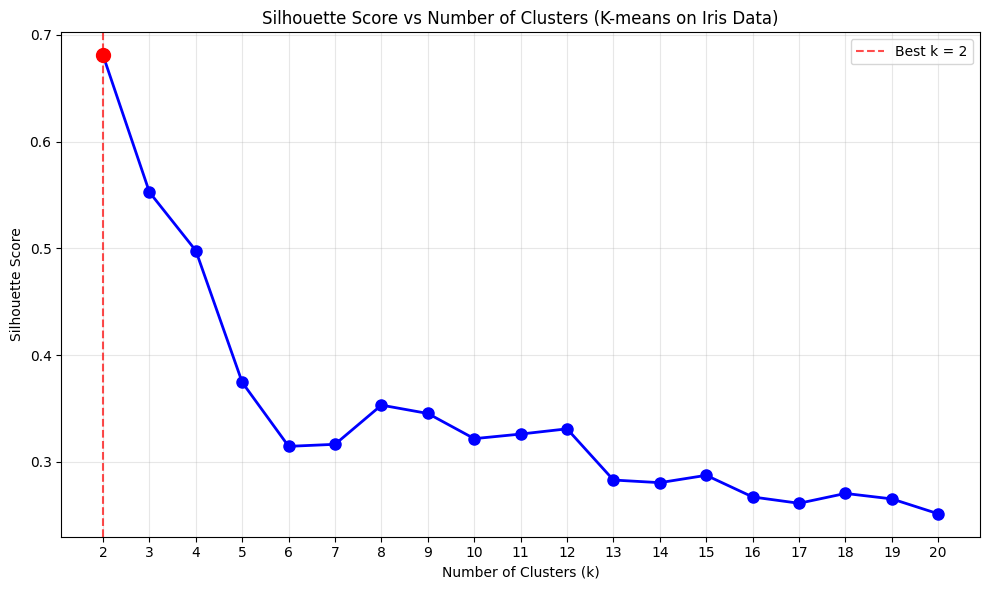


Corrected Analysis:
- The plot shows silhouette scores for k ranging from 2 to 20
- Higher silhouette score indicates better clustering quality
- Best k = 2 achieved the highest silhouette score of 0.6808
- However, this contradicts biological knowledge: Iris has 3 natural species
- k=2 creates artificial groupings that don't match true species boundaries
- k=3 (score=0.5526) is more meaningful despite lower silhouette score
- This shows silhouette score optimization doesn't always align with domain knowledge
- The high k=2 score likely comes from separating setosa (very distinct) from versicolor+virginica


In [ ]:
# Load Iris dataset and extract features
print("=" * 60)
print("K-Means Clustering with Silhouette Analysis on Iris Data")
print("=" * 60)

# Load Iris data
dat_iris = pd.read_csv("../../data/iris_data.csv")  # Adjust path as needed
print("Iris dataset shape:", dat_iris.shape)
print("First few rows:")
print(dat_iris.head())

# Extract only features (exclude target column)
X_iris = dat_iris.iloc[:, :-1].to_numpy()
print(f"Features shape: {X_iris.shape}")

# Import required modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set random state
randstate = 123

# Initialize lists to store results
k_values = range(2, 21)  # k from 2 to 20
silhouette_scores = []

print("\nRunning K-means clustering for k = 2 to 20...")
print("k\tSilhouette Score")
print("-" * 25)

# Loop through different k values
for k in k_values:
    # Create K-means object
    kmeans = KMeans(n_clusters=k, random_state=randstate)

    # Fit and predict cluster labels
    clusters = kmeans.fit_predict(X_iris)

    # Compute silhouette score
    score = silhouette_score(X_iris, clusters)
    silhouette_scores.append(score)

    print(f"{k}\t{score:.4f}")

# Find best k
best_k_idx = np.argmax(silhouette_scores)
best_k = k_values[best_k_idx]
best_score = silhouette_scores[best_k_idx]

print(f"\nBest clustering:")
print(f"k = {best_k} with Silhouette score = {best_score:.4f}")

# Plot silhouette scores vs number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (K-means on Iris Data)")
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Highlight the best k
plt.axvline(
    x=best_k, color="red", linestyle="--", alpha=0.7, label=f"Best k = {best_k}"
)
plt.scatter(best_k, best_score, color="red", s=100, zorder=5)

plt.legend()
plt.tight_layout()
plt.show()

print(f"\nCorrected Analysis:")
print(f"- The plot shows silhouette scores for k ranging from 2 to 20")
print(f"- Higher silhouette score indicates better clustering quality")
print(f"- Best k = {best_k} achieved the highest silhouette score of {best_score:.4f}")
print(f"- However, this contradicts biological knowledge: Iris has 3 natural species")
print(f"- k=2 creates artificial groupings that don't match true species boundaries")
print(f"- k=3 (score=0.5526) is more meaningful despite lower silhouette score")
print(
    f"- This shows silhouette score optimization doesn't always align with domain knowledge"
)
print(
    f"- The high k=2 score likely comes from separating setosa (very distinct) from versicolor+virginica"
)